Sraavika Vaddadi 
<br> 
11/22/24

# **Analysis of Geopolitical Events on Oil Prices**
## Part 3 - Data Analysis 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

In [4]:
# import data files as dataframes 

gpr_price = pd.read_csv('gpr_price.csv', encoding = 'utf-8')
gpr_price['period'] = pd.to_datetime(gpr_price['period'])

## GPR Index Over Time

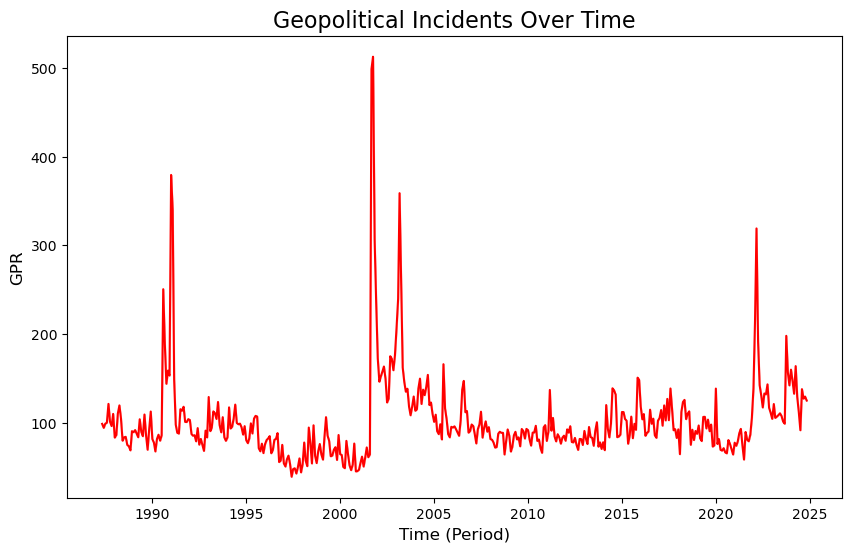

In [6]:
# create a line chart to visualize GPR over time 

plt.figure(figsize=(10, 6))
sns.lineplot(x = gpr_price['period'], y = gpr_price['GPR'], color='red')

plt.xlabel('Time (Period)', fontsize = 12)
plt.ylabel('GPR', fontsize = 12)
plt.title('Geopolitical Incidents Over Time', fontsize = 16)

plt.show()

## WTI and Brent Crude Prices Over Time 

In [8]:
# group oil prices by product 

wti_prices = gpr_price[gpr_price['product'] == 'WTI Crude Oil'].reset_index()
brent_prices = gpr_price[gpr_price['product'] =='UK Brent Crude Oil'].reset_index()

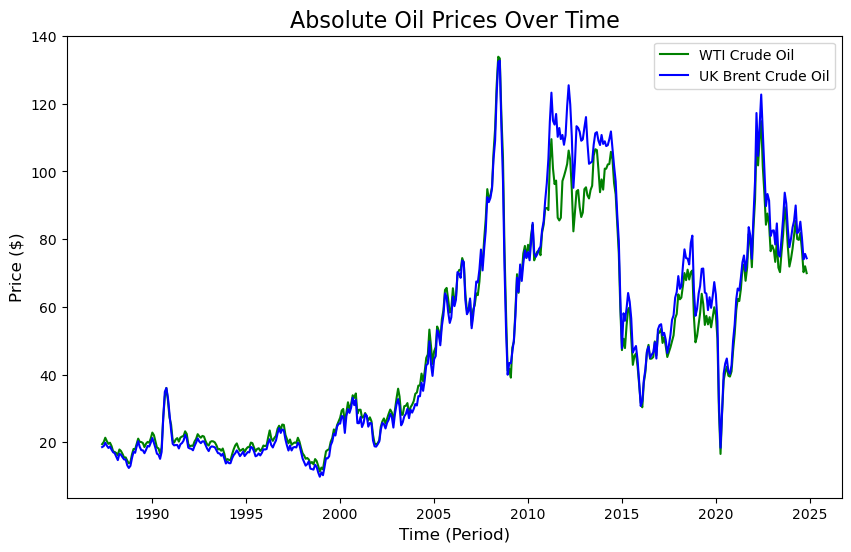

In [9]:
# create a line chart to visualize WTI and Brent crude prices over time 

plt.figure(figsize=(10, 6))

plt.plot(wti_prices['period'], wti_prices['price'], label = 'WTI Crude Oil', color = 'green')
plt.plot(brent_prices['period'], brent_prices['price'], label = 'UK Brent Crude Oil', color = 'blue')

plt.xlabel('Time (Period)', fontsize = 12)
plt.ylabel('Price ($)', fontsize = 12)
plt.legend()
plt.title('Absolute Oil Prices Over Time', fontsize = 16)

plt.show()

In [10]:
# pearson correlation between WTI and Brent crude

oil_product_correl = wti_prices['price'].corr(brent_prices['price'], method = 'pearson')
print(f"Pearson Correlation: {oil_product_correl:.4f}")

# interpretation
if abs(oil_product_correl) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(oil_product_correl) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.9919
Interpretation: Strong linear correlation.


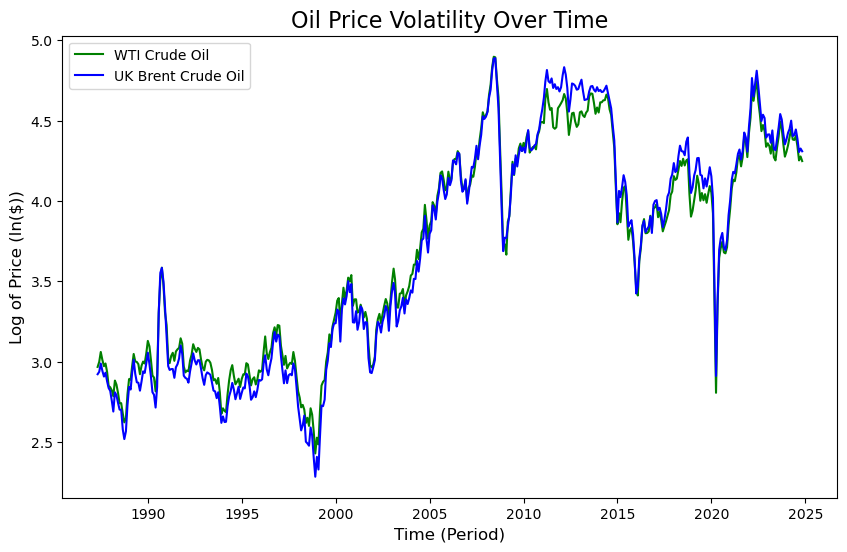

In [11]:
# create a line chart to visualize WTI and Brent crude prices over time 

plt.figure(figsize=(10, 6))

plt.plot(wti_prices['period'], wti_prices['log_price'], label = 'WTI Crude Oil', color = 'green')
plt.plot(brent_prices['period'], brent_prices['log_price'], label = 'UK Brent Crude Oil', color = 'blue')

plt.xlabel('Time (Period)', fontsize = 12)
plt.ylabel('Log of Price (ln($))', fontsize = 12)
plt.legend()
plt.title('Oil Price Volatility Over Time', fontsize = 16)

plt.show()

## Correlation between GPR and Crude Oil

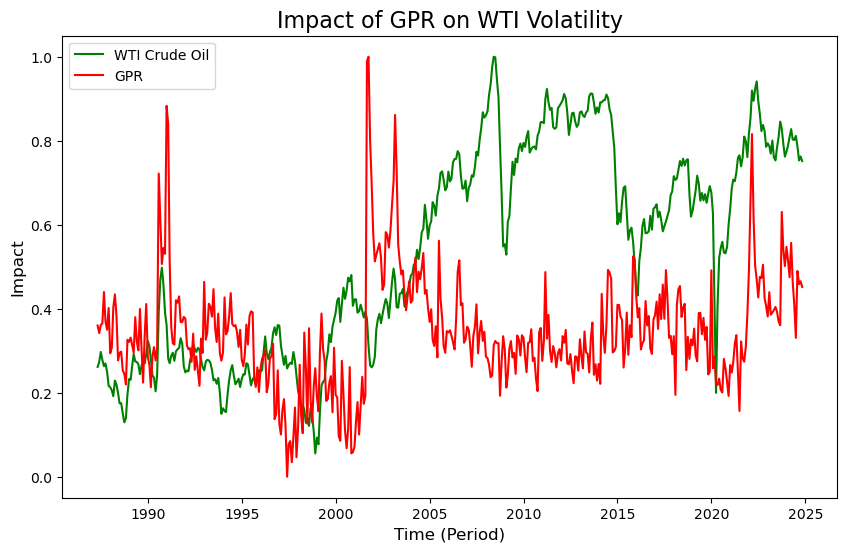

In [13]:
# visualize gpr index scores and WTI prices together

plt.figure(figsize=(10, 6))

plt.plot(wti_prices['period'], wti_prices['normalized_price'], label = 'WTI Crude Oil', color = 'green')
plt.plot(gpr_price['period'], gpr_price['normalized_gpr'], label = 'GPR', color = 'red')

plt.xlabel('Time (Period)', fontsize = 12)
plt.ylabel('Impact', fontsize = 12)
plt.legend()
plt.title('Impact of GPR on WTI Volatility', fontsize = 16)

plt.show()

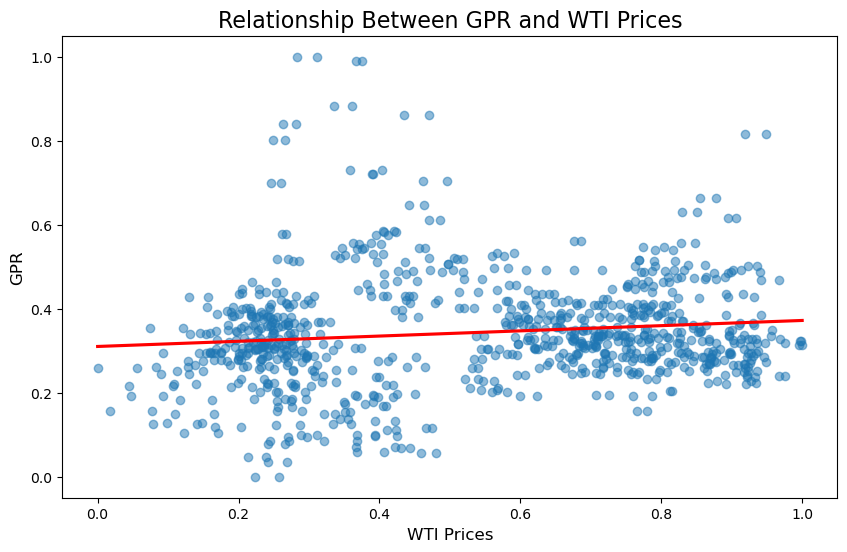

In [14]:
plt.figure(figsize = (10,6))

sns.regplot(x = 'normalized_price',
            y = 'normalized_gpr', 
            data = gpr_price, 
            scatter_kws={"alpha": 0.5}, 
            line_kws={"color": "red"}, 
            ci = None)

plt.title("Relationship Between GPR and WTI Prices", fontsize=16)
plt.xlabel("WTI Prices", fontsize=12)
plt.ylabel("GPR", fontsize=12)

plt.show()

## Analysis of Regime 1 

In [16]:
# create a new dataframe to keep records only from before 9/11

regime_1 = gpr_price[gpr_price['period'] < '2001-09-01'].reset_index()

In [17]:
# group oil prices by product

pre_wti_prices = regime_1 [regime_1 ['product'] == 'WTI Crude Oil'].reset_index()
pre_brent_prices = regime_1 [regime_1 ['product'] =='UK Brent Crude Oil'].reset_index()

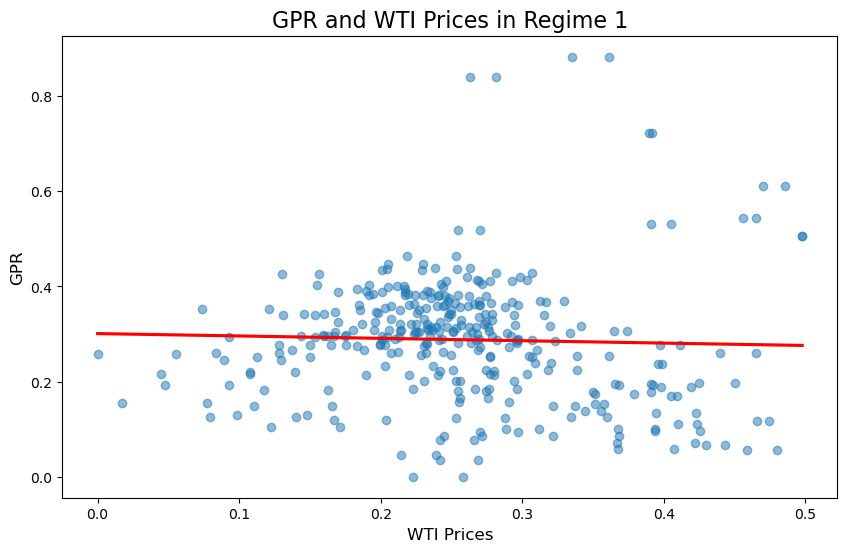

In [18]:
# create scatterplot to visulaize correlation

plt.figure(figsize = (10,6))

sns.regplot(x = 'normalized_price',
            y = 'normalized_gpr', 
            data = regime_1, 
            scatter_kws={"alpha": 0.5}, 
            line_kws={"color": "red"}, 
            ci = None)

plt.title("GPR and WTI Prices in Regime 1", fontsize=16)
plt.xlabel("WTI Prices", fontsize=12)
plt.ylabel("GPR", fontsize=12)

plt.show()

In [19]:
# pearson correlation between gpr and price in regime 1

oil_gpr_correl = regime_1 ['normalized_gpr'].corr(pre_wti_prices['normalized_price'], method = 'pearson')
print(f"Pearson Correlation: {oil_gpr_correl:.4f}")

# interpretation
if abs(oil_gpr_correl) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(oil_gpr_correl) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

# perform the Pearson correlation test
corr_stat, p_value = pearsonr(pre_wti_prices["normalized_gpr"], pre_wti_prices["normalized_price"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")


Pearson Correlation: -0.1695
Interpretation: No or weak linear correlation.
Pearson Correlation Coefficient: -0.0558
P-value: 0.4675
Fail to reject H0: No significant correlation (correlation = 0).


## Analysis of Regime 2 

In [21]:
# create a new dataframe to keep records from after 9/11

regime_2 = gpr_price[gpr_price['period'] >= '2001-09-01'].reset_index()

In [22]:
# group oil prices by product

post_wti_prices = regime_2 [regime_2 ['product'] == 'WTI Crude Oil'].reset_index()
post_brent_prices = regime_2 [regime_2 ['product'] =='UK Brent Crude Oil'].reset_index()

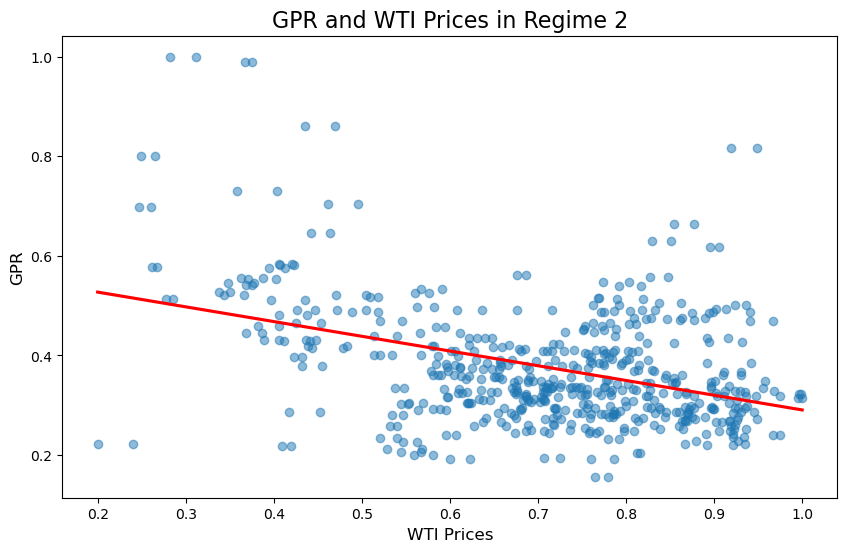

In [23]:
# create scatterplot to visulaize correlation

plt.figure(figsize = (10,6))

sns.regplot(x = 'normalized_price',
            y = 'normalized_gpr', 
            data = regime_2, 
            scatter_kws={"alpha": 0.5}, 
            line_kws={"color": "red"}, 
            ci = None)

plt.title("GPR and WTI Prices in Regime 2", fontsize=16)
plt.xlabel("WTI Prices", fontsize=12)
plt.ylabel("GPR", fontsize=12)

plt.show()

In [24]:
# pearson correlation between gpr and price in regime 2

oil_gpr_correl_2 = regime_2 ['normalized_gpr'].corr(post_wti_prices['normalized_price'], method = 'pearson')
print(f"Pearson Correlation: {oil_gpr_correl_2:.4f}")

# interpretation
if abs(oil_gpr_correl_2) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(oil_gpr_correl_2) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

# perform the Pearson correlation test
corr_stat, p_value = pearsonr(post_wti_prices["normalized_gpr"], post_wti_prices["normalized_price"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")


Pearson Correlation: -0.4860
Interpretation: Moderate linear correlation.
Pearson Correlation Coefficient: -0.3846
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


## Analysis of the biggest geopolitical event

In [26]:
# melt category columns from wide to long data

gpr_price_melted = gpr_price.melt(id_vars=gpr_price.columns.difference(['gpr_article_proportion', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8']),
                                  value_vars=['gpr_article_proportion','cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8'],
                                  var_name='category', value_name='value')

In [27]:
# what incident had the most news coverage

highest_gpr_news_coverage = gpr_price[gpr_price['gpr_article_proportion'] == gpr_price['gpr_article_proportion'].max()]
display(highest_gpr_news_coverage)

,period,GPR,gpr_threats,gpr_acts,total_articles,gpr_article_proportion,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,log_GPR,normalized_gpr,product,price,log_price,normalized_price
346,2001-10-01,512.53,261.35,854.07,36259.0,15.37,0.34,0.07,0.98,0.32,1.8,0.55,0.71,8.67,6.239359,1.0,WTI Crude Oil,22.17,3.098740,0.311698
347,2001-10-01,512.53,261.35,854.07,36259.0,15.37,0.34,0.07,0.98,0.32,1.8,0.55,0.71,8.67,6.239359,1.0,UK Brent Crude Oil,20.54,3.022374,0.282468


In [28]:
# oil prices before and after 9/11 

oil_sept_2001 = gpr_price[gpr_price['period'] == '2001-09-01']
oil_oct_2001 = gpr_price[gpr_price['period'] == '2001-10-01']
oil_nov_2001 = gpr_price[gpr_price['period'] == '2001-11-01']

display(oil_sept_2001, oil_oct_2001, oil_nov_2001)

,period,GPR,gpr_threats,gpr_acts,total_articles,gpr_article_proportion,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,log_GPR,normalized_gpr,product,price,log_price,normalized_price
344,2001-09-01,498.65,260.17,841.18,33230.0,14.96,0.47,0.01,1.37,0.48,1.05,0.64,0.45,8.78,6.211904,0.989336,WTI Crude Oil,26.20,3.265759,0.375629
345,2001-09-01,498.65,260.17,841.18,33230.0,14.96,0.47,0.01,1.37,0.48,1.05,0.64,0.45,8.78,6.211904,0.989336,UK Brent Crude Oil,25.62,3.243373,0.367060


,period,GPR,gpr_threats,gpr_acts,total_articles,gpr_article_proportion,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,log_GPR,normalized_gpr,product,price,log_price,normalized_price
346,2001-10-01,512.53,261.35,854.07,36259.0,15.37,0.34,0.07,0.98,0.32,1.8,0.55,0.71,8.67,6.239359,1.0,WTI Crude Oil,22.17,3.098740,0.311698
347,2001-10-01,512.53,261.35,854.07,36259.0,15.37,0.34,0.07,0.98,0.32,1.8,0.55,0.71,8.67,6.239359,1.0,UK Brent Crude Oil,20.54,3.022374,0.282468


,period,GPR,gpr_threats,gpr_acts,total_articles,gpr_article_proportion,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,log_GPR,normalized_gpr,product,price,log_price,normalized_price
348,2001-11-01,306.79,149.8,509.75,34385.0,9.2,0.37,0.04,0.82,0.54,1.02,0.55,0.7,5.45,5.726163,0.800663,WTI Crude Oil,19.64,2.977568,0.265317
349,2001-11-01,306.79,149.8,509.75,34385.0,9.2,0.37,0.04,0.82,0.54,1.02,0.55,0.7,5.45,5.726163,0.800663,UK Brent Crude Oil,18.80,2.933857,0.248586


In [29]:
# change threat type datatype to category and assign name 

sept11_threat_cat = gpr_price_melted[(gpr_price_melted['period'] == '2001-10-01') & (gpr_price_melted['product'] == 'WTI Crude Oil')]
sept11_threat_cat = sept11_threat_cat.sort_values(by='value', ascending=False)

def categorize_category(category):
    if category in ['cat_1']:
        return 'War Threats'
    elif category in ['cat_2']:
        return 'Peace Threats'
    elif category in ['cat_3']:
        return 'Military Buildup'
    elif category in ['cat_4']:
        return 'Nuclear Threats'
    elif category in ['cat_5']:
        return 'Terrorist Threats'
    elif category in ['cat_6']:
        return 'Beginning of War'
    elif category in ['cat_7']:
        return 'Escalation of War'
    elif category in ['cat_8']:
        return 'Terrorist Acts'
    elif category in ['gpr_article_proportion']: 
        return 'Total GPR Article Percent'
    else:
        return category

sept11_threat_cat['category'] = sept11_threat_cat['category'].apply(categorize_category)

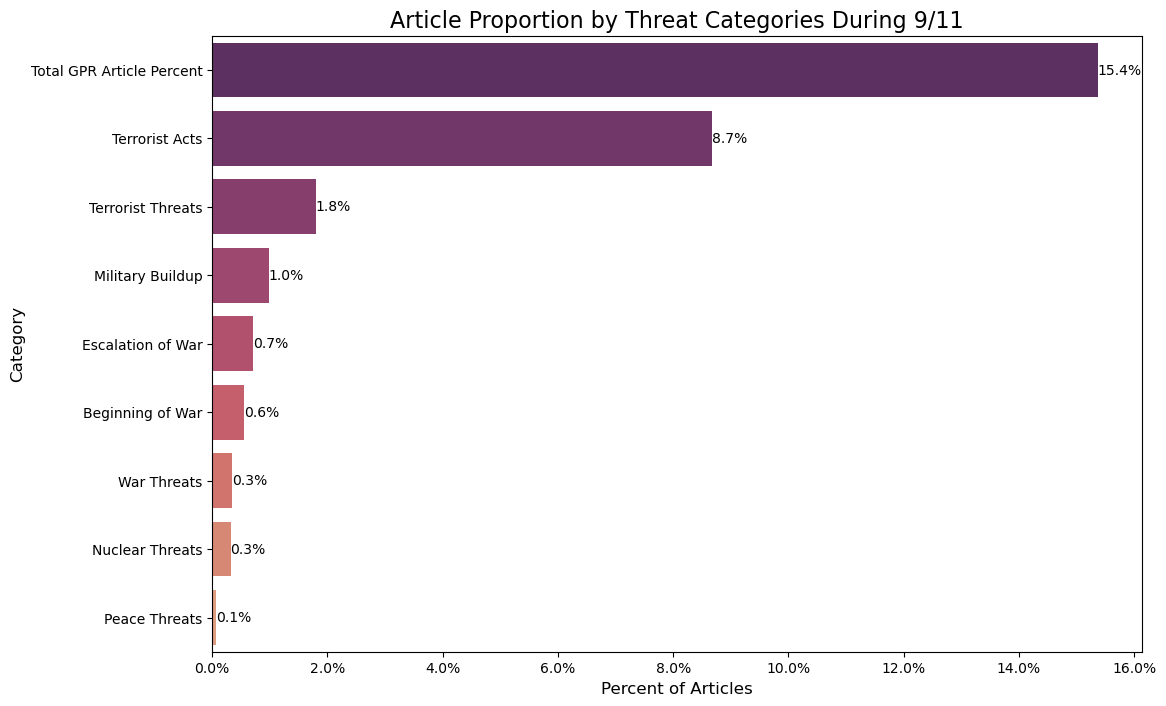

In [30]:
# create a bar chart to visualize GPR article categories in September 2001

colors = sns.color_palette("flare", n_colors=len(sept11_threat_cat['category'].unique()))[::-1]

def dollar_format(x, pos):
    return f"{x:,.1f}%"  

plt.figure(figsize=(12, 8))

ax = sns.barplot(y='category', x='value', data=sept11_threat_cat, palette=colors, hue = 'category')  

plt.gca().xaxis.set_major_formatter(FuncFormatter(dollar_format))

plt.title("Article Proportion by Threat Categories During 9/11", fontsize=16)
plt.xlabel("Percent of Articles", fontsize=12)
plt.ylabel("Category", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, labels=[f"{val.get_width():,.1f}%" for val in container])

plt.show()
